In [1]:
import datetime as dt
import os, sys
import netCDF4 as nc
import matplotlib as mpl
import numpy as np
import numpy.ma as ma
from scipy.spatial import distance
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib import cm
import matplotlib.colors as mpl_colors
from matplotlib import rc
from mpl_toolkits.axes_grid1 import make_axes_locatable



from salishsea_tools import geo_tools, viz_tools

get_ipython().magic('matplotlib inline')

In [2]:
#Parameters

cmap = plt.get_cmap('nipy_spectral')
cmap.set_bad('burlywood')

H = 24 #One day in hours

#Ariane parameters
tunit= 3600

outint = 20 * 60 # 20 min in seconds

pph = int(tunit / outint) #points per hour

lmt = 1896 #points per particle


#RUN parameters

nday= 50

basedir = "/ocean/gsgarbi/analysis-giorgio/time_series/results2016/"

plotsdir = "/ocean/gsgarbi/analysis-giorgio/time_series/results2016/plots"


position = nday * pph * H # d * num/h * h/d = num

In [3]:
#function to get points from an indiviual month

def get_pts(direct):
    
    points = []
        
    particle = 1 #start particle counter
    
    start = dt.datetime.now()
    print ("start {}: ".format(direct), start)


    with open(basedir + direct + "/traj.txt") as file:

        for i, line in enumerate(file):

            line = line.strip('\n').split()

            line = [float(k) for k in line]

            line = np.array(line)


            if line[0] == particle:
                index = i + position
                particle += 1

            if i == index:
                points.append (line)
                
        print ("time: ", dt.datetime.now() - start)
                
                
    return points

In [4]:
# # test cell

# year0 = year1 = year2 = [] #for each depth

# jan = get_pts("/ocean/gsgarbi/analysis-giorgio/time_series/results2016/20160101_20160131_427d/")

# feb = get_pts("/ocean/gsgarbi/analysis-giorgio/time_series/results2016/20160201_20160229_401d/")


# year0 = jan[0::3] + feb[0::3]
# year1 = jan[1::3] + feb[1::3]
# year2 = jan[2::3] + feb[2::3]



In [5]:
# Get points for the year - this process should take about 42min for 12 months (3.5min per month)

path = "/ocean/gsgarbi/analysis-giorgio/time_series/results2016/"

dirs = os.listdir( path )

dirs.sort()

dirs = dirs [0:12]
    


In [12]:
def plot(points, title = 'title', picname = "noname"):
    
    Iona = (-123.30898284912109, 49.187351226806641)
    S15 = (-123.3114, 49.130412)
    S16 = (-123.317415, 49.1214)
    xl=(-126.2,-122.2)
    yl=(47.1,51)



    #prepare plot and constants
    plt.clf()
    start = dt.datetime.now()
    print ("start: ", start)
#     np.shape(points)
    mesh = nc.Dataset("/ocean/gsgarbi/mesh_mask_downbyone2.nc")
    tmask=np.copy(mesh.variables['tmask'])
    mesh.close()
    fb=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/bathy_downonegrid2.nc')
    nav_lon=np.copy(fb.variables['nav_lon'])
    nav_lat=np.copy(fb.variables['nav_lat'])
    fb.close()
    
    lonlim=[np.min(nav_lon),np.max(nav_lon)]
    latlim=[np.min(nav_lat),np.max(nav_lat)]


    griddata=0.0*tmask[0,0,:,:]
    griddata.shape
#     np.shape(points)[0]

    griddata, iedges, jedges = np.histogram2d(points[:,1],points[:,2],bins=[100,200],range=[lonlim,latlim])


    Jedges,Iedges=np.meshgrid(jedges,iedges)
    

    fig, axs = plt.subplots(1,1,figsize=(9,8))
    mesh0 = axs.pcolormesh(Iedges,Jedges,griddata,cmap=cmap)
    mesh0.set_clim(vmin = 0, vmax = 40)
    axs.set_xlim(xl)
    axs.set_ylim(yl)
    pos=axs.get_position()
    pos2=(pos.bounds[0],pos.bounds[1],pos.bounds[2]-.05,pos.bounds[3])
    axs.set_position(pos2)
    axs2 = plt.axes(pos2)
    viz_tools.set_aspect(axs,coords='map')
    mesh1=axs2.pcolormesh(nav_lon,nav_lat,np.ma.masked_where(tmask[0,0,:,:]==1,tmask[0,0,:,:]),cmap='YlOrRd')
    axs2.set_xlim(xl)
    axs2.set_ylim(yl)
    axs2.patch.set_alpha(0)
    viz_tools.set_aspect(axs2,coords='map')
    axsCB=plt.axes((pos2[0]+pos2[3],pos2[1],.02,pos2[3]))
    cbar = fig.colorbar(mesh0,cax=axsCB)
    cbar.set_label ("Counts")
    
    axs.set_title( title + "\n Total of trajectories: {}".format( int(np.sum(griddata)) ) )
    
    el = Ellipse((2, -1), 0.5, 0.5)

    axs2.annotate(
            "IONA",
            xy=(Iona[0], Iona[1]), xytext=(50, 10),
            textcoords='offset points', ha='left', va='bottom', color = (0.937, 0.439, 0.043),
            arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                                      fc=(1,1,1), ec=(1., .5, .5),
                                      patchA=None,
                                      patchB=el,
                                      relpos=(0.2, 0.8),
                                      connectionstyle="arc3,rad=-0.1"))

    
    plt.savefig(picname, transparent = True)

In [7]:
year1 = []
year2 = []
year3 = []

for file in dirs:
    month = get_pts(file)
    year1 += month [0::3]
    year2 += month [1::3]
    year3 += month [2::3]


start 20160101_20160131_427d:  2017-04-21 12:47:57.957098
time:  0:03:50.172225
start 20160201_20160229_401d:  2017-04-21 12:51:48.129655
time:  0:03:25.902699
start 20160301_20160331_355d:  2017-04-21 12:55:14.033126
time:  0:03:12.983872
start 20160401_20160430_325d:  2017-04-21 12:58:27.018018
time:  0:02:49.060479
start 20160501_20160531_294d:  2017-04-21 13:01:16.079372
time:  0:02:41.557133
start 20160601_20160630_264d:  2017-04-21 13:03:57.722450
time:  0:02:18.579646
start 20160701_20160731_252d:  2017-04-21 13:06:16.303053
time:  0:02:15.981882
start 20160801_20160831_217d:  2017-04-21 13:08:32.300368
time:  0:01:56.395632
start 20160901_20160930_172d:  2017-04-21 13:10:28.696937
time:  0:01:27.085396
start 20161001_20161031_141d:  2017-04-21 13:11:55.783154
time:  0:01:14.431714
start 20161101_20161130_111d:  2017-04-21 13:13:10.215950
time:  0:00:56.434638
start 20161201_20161231_95d:  2017-04-21 13:14:06.651391
time:  0:00:50.325748


In [8]:
#check pickle later

start:  2017-04-21 15:36:51.165879


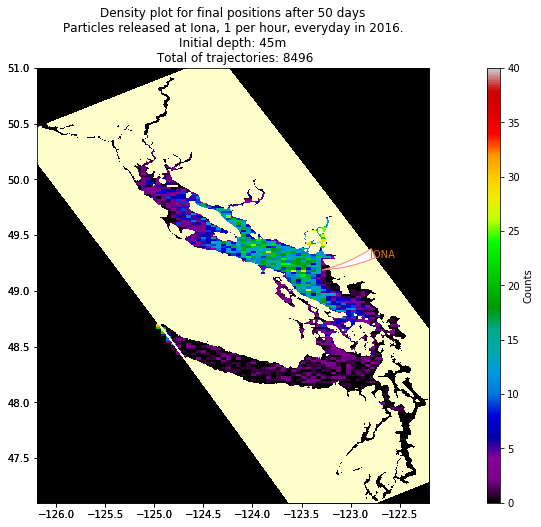

In [20]:
points = np.array(year1) #back to original name. convert to np.array

depth = 45

title = (
    "Density plot for final positions after {} days\n"
    "Particles released at Iona, 1 per hour, everyday in 2016.\n"
    "Initial depth: {}m".format(nday, depth)
)

picname = "/ocean/gsgarbi/analysis-giorgio/2017apr20_presentation/{}d_{}m".format(nday, depth)

plot (points, title, picname)

start:  2017-04-21 15:36:52.253098


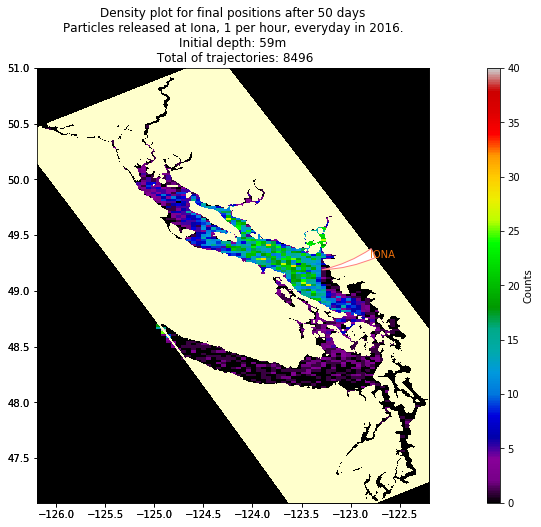

In [21]:
points = np.array(year2) #back to original name. convert to np.array

depth = 59


picname = "/ocean/gsgarbi/analysis-giorgio/2017apr20_presentation/{}d_{}m".format(nday, depth)

title = (
    "Density plot for final positions after {} days\n"
    "Particles released at Iona, 1 per hour, everyday in 2016.\n"
    "Initial depth: {}m".format(nday, depth)
)

plot (points, title, picname)

start:  2017-04-21 15:36:53.369092


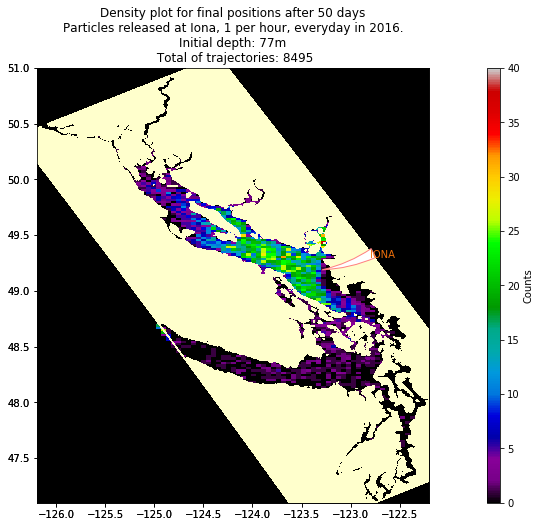

In [22]:
points = np.array(year3) #back to original name. convert to np.array

depth = 77

picname = "/ocean/gsgarbi/analysis-giorgio/2017apr20_presentation/{}d_{}m".format(nday, depth)

title = (
    "Density plot for final positions after {} days\n"
    "Particles released at Iona, 1 per hour, everyday in 2016.\n"
    "Initial depth: {}m".format(nday, depth)
)

plot (points, title, picname)